# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("11.6 cars_train.csv")
test = pd.read_csv("11.6 cars_test.csv")

In [2]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [3]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
Xtrain, ytrain, Xtest, ytest = train.drop(columns=['selling_price']), train.selling_price, \
                               test.drop(columns=['selling_price']), test.selling_price,

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [4]:
# Ваш код здесь
# Xtrain.dropna(subset=)
index_na = ytrain[ytrain.isna()].index
Xtrain.drop(index_na, axis=0, inplace=True)
ytrain.drop(index_na, axis=0, inplace=True)

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [5]:
# Ваш код здесь
Xtrain.mileage = Xtrain.mileage.str.split(expand = True).iloc[:,0].astype('float64')
Xtrain.engine = Xtrain.engine.str.split(expand = True).iloc[:,0].astype('float64')
Xtrain.max_power = Xtrain.max_power.str.split(expand = True).iloc[:,0].astype('float64')

In [6]:
Xtest.mileage = Xtest.mileage.str.split(expand = True).iloc[:,0].astype('float64')
Xtest.engine = Xtest.engine.str.split(expand = True).iloc[:,0].astype('float64')
Xtest.max_power = Xtest.max_power.str.split(expand = True).iloc[:,0].astype('float64')

Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [7]:
# Ваш код здесь
sample = ['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']
Xtrain = Xtrain.loc[:,sample]
Xtest = Xtest.loc[:,sample]



Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [8]:
# Ваш код здесь
Xtrain.isna().sum()

year           0
km_driven      0
seats        202
engine       202
mileage      202
max_power    196
dtype: int64

In [9]:
average_seats = Xtrain.seats.mean()
average_engine = Xtrain.engine.mean()
average_mileage = Xtrain.mileage.mean()
average_max_power = Xtrain.max_power.mean()

Xtrain.seats = Xtrain.seats.fillna(average_seats)
Xtrain.engine = Xtrain.engine.fillna(average_engine)
Xtrain.mileage = Xtrain.mileage.fillna(average_mileage)
Xtrain.max_power = Xtrain.max_power.fillna(average_max_power)

In [10]:
Xtest.seats = Xtest.seats.fillna(average_seats)
Xtest.engine = Xtest.engine.fillna(average_engine)
Xtest.mileage = Xtest.mileage.fillna(average_mileage)
Xtest.max_power = Xtest.max_power.fillna(average_max_power)

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [11]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)
pred_linreg = linreg.predict(Xtest)

forest = RandomForestRegressor()
forest.fit(Xtrain, ytrain)
pred_forest = forest.predict(Xtest)

print(f'Значение r2 для линейной регрессии: {r2_score(ytest, pred_linreg)}')
print(f'Значение r2 для случайного леса: {r2_score(ytest, pred_forest)}')


Значение r2 для линейной регрессии: 0.6485839251280137
Значение r2 для случайного леса: 0.9616484733622669


Какая модель получилась лучше?

In [12]:
# Ваш ответ здесь
# Модель случайного леса получилась значительно лучше

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [13]:
# Ваш код здесь Т.к. посчитать все вместе не получилось, выполню подбор параметров последовательно
# from sklearn.model_selection import GridSearchCV
# parametrs = { 'n_estimators': np.arange(100,401, 100),
#             'max_depth' : np.arange(2, 25, 4),
#             'max_features' : ['sqrt', 'log2', None],
#             'min_samples_leaf' : np.arange(1, 6, 1),
#             'min_samples_split' : np.arange(2, 6, 1)}
# grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
# grid.fit(Xtrain, ytrain)
# print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
# print(f'Значение к2 для случайного леса: {grid.best_score_}')

In [14]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': np.arange(100,401, 100),
            }
grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
grid.fit(Xtrain, ytrain)
print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
print(f'Значение r2 для случайного леса: {grid.best_score_}')

Лучшие параметры случайного леса:
 {'n_estimators': 400}
Значение r2 для случайного леса: 0.9538093078616147


In [15]:
from sklearn.model_selection import GridSearchCV
parametrs = {'n_estimators': [400],
            'max_depth' : np.arange(2, 25, 4)}
grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
grid.fit(Xtrain, ytrain)
print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
print(f'Значение r2 для случайного леса: {grid.best_score_}')

Лучшие параметры случайного леса:
 {'max_depth': 18, 'n_estimators': 400}
Значение r2 для случайного леса: 0.9539031395460119


In [16]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': [400],
            'max_depth' : [14],
            'max_features' : ['sqrt', 'log2', None]}
grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
grid.fit(Xtrain, ytrain)
print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
print(f'Значение r2 для случайного леса: {grid.best_score_}')

Лучшие параметры случайного леса:
 {'max_depth': 14, 'max_features': None, 'n_estimators': 400}
Значение r2 для случайного леса: 0.9535218624601516


In [47]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': [400],
            'max_depth' : [14],
            'max_features' : [None],
            'min_samples_leaf' : np.arange(1, 6, 1)}
grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
grid.fit(Xtrain, ytrain)
print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
print(f'Значение r2 для случайного леса: {grid.best_score_}')

Лучшие параметры случайного леса:
 {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 400}
Значение r2 для случайного леса: 0.9532095581153218


In [17]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': [400],
            'max_depth' : [14],
            'max_features' : [None],
            'min_samples_leaf' : [1],
            'min_samples_split' : np.arange(2, 6, 1)}
grid = GridSearchCV(forest, parametrs, cv=3, scoring = 'r2')
grid.fit(Xtrain, ytrain)
print(f'Лучшие параметры случайного леса:\n {grid.best_params_}')
print(f'Значение r2 для случайного леса: {grid.best_score_}')

Лучшие параметры случайного леса:
 {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Значение r2 для случайного леса: 0.953929761174309


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [18]:
# Ваш код здесь
forest = RandomForestRegressor(max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=400)
forest.fit(Xtrain, ytrain)
pred_forest = forest.predict(Xtest)

print(f'Значение r2 для случайного леса: {r2_score(ytest, pred_forest)}')

Значение r2 для случайного леса: 0.9627205254583434


Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

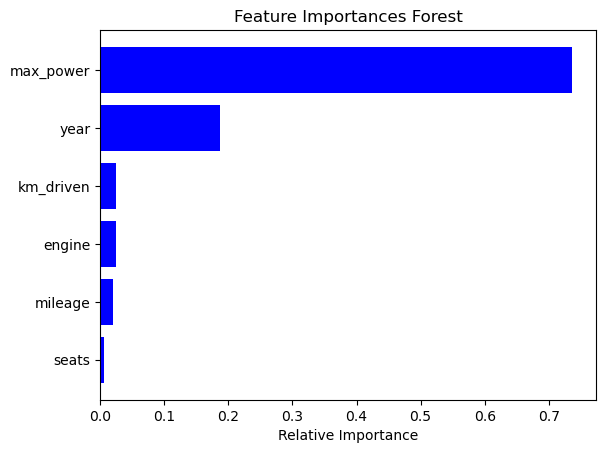

In [19]:
# Ваш код здесь
import matplotlib.pyplot as plt
features = Xtrain.columns
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
forest.feature_importances_

array([0.18757252, 0.02459466, 0.00648449, 0.02438068, 0.02012067,
       0.73684697])